In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [142]:
df =   pd.read_csv('cell_samples.csv')

In [143]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [144]:
df = df.drop(['ID'], axis = 1)

In [145]:
df.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [146]:
df.tail()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4
698,4,8,8,5,4,5,10,4,1,4


In [147]:
#converting types of the data ie object to int
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()] # Converts invalid values to NaN
df['BareNuc'] = df['BareNuc'].astype('int')

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Clump        683 non-null    int64
 1   UnifSize     683 non-null    int64
 2   UnifShape    683 non-null    int64
 3   MargAdh      683 non-null    int64
 4   SingEpiSize  683 non-null    int64
 5   BareNuc      683 non-null    int64
 6   BlandChrom   683 non-null    int64
 7   NormNucl     683 non-null    int64
 8   Mit          683 non-null    int64
 9   Class        683 non-null    int64
dtypes: int64(10)
memory usage: 58.7 KB


In [149]:
df.describe()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [150]:
df.isnull().sum()

Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

<Axes: >

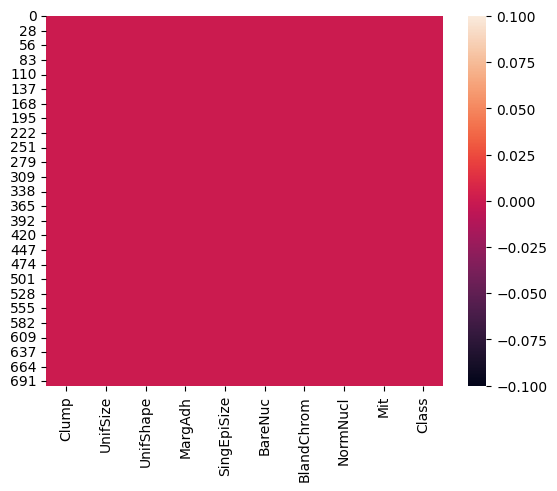

In [151]:
sns.heatmap(df.isnull())

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
df.columns

Index(['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc',
       'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [154]:
X = (df.drop(['Class'],axis = 1))
y = df['Class']

In [155]:
X.shape

(683, 9)

In [156]:
y.shape

(683,)

In [157]:
X_test, X_train, y_test, y_train = train_test_split(X,y, test_size = 0.33, random_state=42)

In [158]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', gamma='auto')

In [159]:
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [160]:
y_pred = svc.predict(X_test)
y_pred

array([2, 2, 2, 2, 4, 4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2,
       2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4,
       4, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4,
       2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2,
       2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2,
       4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2,
       2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 2, 4, 4, 4, 2,
       2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2,
       4, 2, 2, 2, 4, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2,
       2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2,
       2, 2, 2, 4, 4, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2,
       2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2,
       2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2,

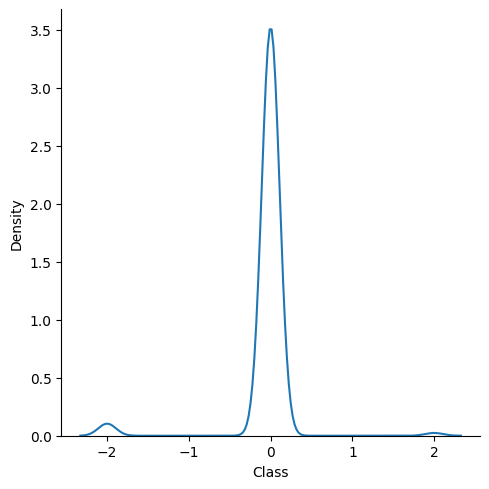

In [161]:
sns.displot(y_test-y_pred, kind = 'kde')

In [167]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [168]:
acc = accuracy_score(y_test, y_pred)

In [169]:
print(acc)

0.9649890590809628


In [163]:
result1 = classification_report(y_test, y_pred)
result2 = confusion_matrix(y_test, y_pred)

In [164]:
print(result1)
print(result2)

              precision    recall  f1-score   support

           2       0.99      0.96      0.97       302
           4       0.92      0.98      0.95       155

    accuracy                           0.96       457
   macro avg       0.96      0.97      0.96       457
weighted avg       0.97      0.96      0.97       457

[[289  13]
 [  3 152]]
